<a href="https://colab.research.google.com/github/ebzkurt1/ml_from_scratch/blob/main/JaxProgramming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Learning JAX Library


> *Fundamentally, JAX is a library that enables transformations of array-manipulating programs written with a NumPy-like API.*



> One useful feature of JAX is that the same code can be run on different backends – CPU, GPU and TPU.





In [5]:
# Importing the base libraries
import jax
import numpy as np
import matplotlib.pyplot as plt

# Importing the numpy functions of JAX
import jax.numpy as jnp

# Importing special functions of JAX
from jax import grad, jit, vmap, pmap

# Importing low level JAX APIs
from jax import lax, make_jaxpr, random, device_put

In [6]:
x = jnp.arange(10)
print(x)
print("In JAX arrays are represented as DeviceArrays\n")
display(x)

x

[0 1 2 3 4 5 6 7 8 9]
In JAX arrays are represented as DeviceArrays



DeviceArray([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

Text(0, 0.5, 'y')

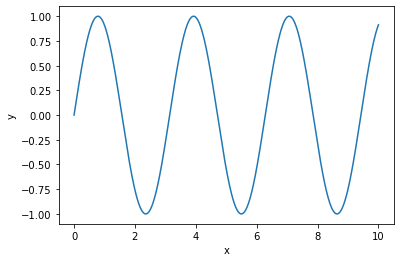

In [7]:
x = jnp.linspace(0, 10, 1000)
y = 2 * jnp.sin(x) * jnp.cos(x)
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")

In [10]:
# JAX devicearrays are Immutable compared to Numpy
print("x[2]=4 will give an error")

index = 5
new_value = 10

y = x.at[index].set(new_value)

x[2]=4 will give an error


In [15]:
# While assigning random numbers in JAX, each time we need to specify the random key

seed = 1
random_key = random.PRNGKey(seed)

x = random.normal(random_key, (3,))
print(type(x),x)

<class 'jaxlib.xla_extension.DeviceArray'> [ 0.17269018 -0.64765567  1.2229712 ]


In [18]:
# JAX is AI accelator agnostic

array_size = 10000

jnp_array = random.normal(random_key, (array_size, array_size), dtype=jnp.float32)
np_array = np.random.normal(size=(array_size, array_size)).astype(np.float32)

%timeit jnp.dot(jnp_array, jnp_array.T).block_until_ready()
%timeit np.dot(np_array,np_array.T)
%timeit jnp.dot(np_array, np_array.T).block_until_ready()

np_device_array = device_put(np_array)
%timeit jnp.dot(np_device_array, np_device_array.T).block_until_ready()

1 loop, best of 5: 1.57 s per loop
1 loop, best of 5: 14.3 s per loop
1 loop, best of 5: 1.84 s per loop
1 loop, best of 5: 1.54 s per loop


### jit Function


The slowest run took 114.10 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 5: 4.38 ms per loop
The slowest run took 183.41 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 5: 751 µs per loop


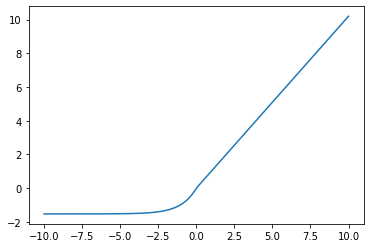

In [20]:
def selu(x, alpha=1.5, lmbda=1.02):
    return lmbda * jnp.where(x>0, x, alpha*jnp.exp(x)-alpha)

selu_jit = jit(selu)

plt.plot(jnp.linspace(-10,10,1000),selu(jnp.linspace(-10,10,1000)))

dummy_data = random.normal(random_key, (10000000,))

%timeit selu(dummy_data).block_until_ready()
%timeit selu_jit(dummy_data).block_until_ready()

### grad Function

In [27]:
def sigmoid(x):
    return 1.0/(1.0+jnp.exp(-x))

x = jnp.arange(3.)
grad_sigmoid = grad(sigmoid)
print(grad_sigmoid(x))

TypeError: ignored